In [4]:
import pandas as pd
import numpy as np
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
output_notebook()

Loading BokehJS ...

In [5]:
dfw_frame = pd.read_csv("DFW_with_rating.csv")
dfw_frame.head()

,Year,Semester,College,Department,Course,Title,Total Grades,"D, F, W Grades",% DFW,Difficulty
0,2016,Fall,CALS,A B E,102X,LEARNING COMMUNITIE,74,2,3,1
1,2017,Fall,CALS,A B E,102X,LEARNING COMMUNITIE,79,4,5,1
2,2015,Spring,CALS,A B E,110,EXPERNC AG&BIO ENGR,96,2,2,1
3,2016,Spring,CALS,A B E,110,EXPERNC AG&BIO ENGR,130,0,0,1
4,2017,Spring,CALS,A B E,110,EXPERNC AG&BIO ENGR,101,2,2,1


In [6]:
# dfw_frame = dfw_frame.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
dfw_2017 = dfw_frame[(dfw_frame['Year'] == 2017)]
dfw_2017 = dfw_2017[dfw_2017['Semester'] == "Fall"]
dfw_2017.head()

,Year,Semester,College,Department,Course,Title,Total Grades,"D, F, W Grades",% DFW,Difficulty
1,2017,Fall,CALS,A B E,102X,LEARNING COMMUNITIE,79,4,5,1
11,2017,Fall,CALS,A B E,160,SYST PROB SOLV&PROG,55,9,16,4
19,2017,Fall,CALS,A B E,170,ENG GRPHC&INTRO DSN,65,2,3,1
27,2017,Fall,CALS,A B E,201,SMNR:PREP FOR WRKPL,12,0,0,1
33,2017,Fall,CALS,A B E,216,FND AG &BIOSYS ENGR,86,13,15,3


In [7]:
# dfw_2017.to_csv("")
dfw_2017 = dfw_2017[dfw_2017['% DFW'] != 100]

In [8]:
from bokeh.transform import jitter

COLLEGES = ['BUS', 'CALS', 'DSGN', 'ENGR', 'H SCI', 'INDIS', 'LAS', 'LIB']

source = ColumnDataSource(dfw_2017)

p = figure(plot_width=800, plot_height=300, y_range=COLLEGES, x_axis_type='linear', 
           title="Drop/Fail rates by College")

p.circle(x='% DFW', y=jitter('College', width=0.6, range=p.y_range),  source=source, alpha=.3)

p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

In [9]:
dfw_2017.boxplot(by='College', column='% DFW', figsize=(12,8), rot=90)

In [10]:
majors_ranked = pd.read_csv("major_rating.csv")
majors_ranked.head()

,College,Major,Class,Difficulty
0,CALS,Agricultural and Life Sciences Education- B.S ...,ENGL 150,2.181818
1,CALS,Agricultural and Life Sciences Education- B.S ...,ENGL 250,2.333333
2,CALS,Agricultural and Life Sciences Education- B.S ...,AGEDS 311,1.475000
3,CALS,Agricultural and Life Sciences Education- B.S ...,LIB 160,2.555556
4,CALS,Agricultural and Life Sciences Education- B.S ...,PSYCH 230,3.177778


In [11]:
majors_ranked = majors_ranked.groupby(['College','Major'], as_index=False).mean(numeric_only=True)
majors_ranked[majors_ranked['College'] == 'LAS']

,College,Major,Difficulty
110,LAS,Advertising- B.A.,1.975619
111,LAS,Anthropology- B.A.- B.S.,2.942994
112,LAS,Biochemistry- B.S.,3.263313
113,LAS,Bioinformatics and Computational Biology B.S.,3.822727
114,LAS,Biological/Pre-Medical Illustration- B.A.,2.823556
115,LAS,Biology- B.S.,3.528255
116,LAS,Biophysics- B.S.,3.263313
117,LAS,Chemistry- B.A.,3.593845
118,LAS,Chemistry- B.S.,3.593845
119,LAS,Communication Studies- B.A.,2.056105


In [12]:
from bokeh.transform import jitter

COLLEGES = ['BUS', 'CALS', 'DSGN', 'ENGR', 'H SCI', 'INDIS', 'LAS', 'LIB']

source = ColumnDataSource(majors_ranked)

p = figure(plot_width=800, plot_height=300, y_range=COLLEGES, x_axis_type='linear', 
           title="Difficulty per Major in Relation to College")

p.circle(x='Difficulty', y=jitter('College', width=1, range=p.y_range),  source=source, alpha=0.6)


p.x_range.range_padding = 0
p.ygrid.grid_line_color = None

show(p)

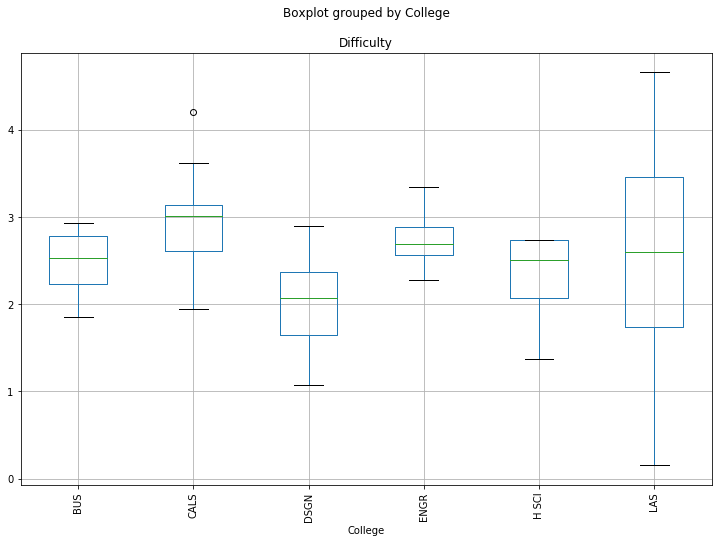

In [13]:
majors_ranked.boxplot(by='College', column='Difficulty', figsize=(12,8), rot=90)